# What _things_ really make a wine good...
Using Linear Regression to predict wine quality.

# Lesson Plan 

* What is linear regression [slides](https://docs.google.com/presentation/d/1zIm-B1dtiDqmzLkwobKfVGag-ShnyxoAn4_NmcTlndI/edit?usp=sharing).
    * Why it is used.
    * How it is used in the real world.
<br><br>
* Example of linear regression with wine data
    * Load and inspect data
    * Select Features
    * Break out into testing / training data 
    * Train model (link to sklearn docs and statmodels)
    * Score model and how to interpert the score
    * Inspect coefficients
    * Predict new wine quality scores of test data
    * Saving / Exporting your model
    * How to improve your model score
<br><br>
* Lab
    * Train, score, and export a linear regression model using the white wine data set. 

## Import Our Libraries

In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Lets have a look at our data

In [2]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/winequality-red.csv')

# DISPLAY THE FIRST 5 ROWS
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5


# Inspect our data using `df.describe()` function.

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,4.010000,2.000000,14.900000,8.000000


# Lets do further inspection using histograms. 

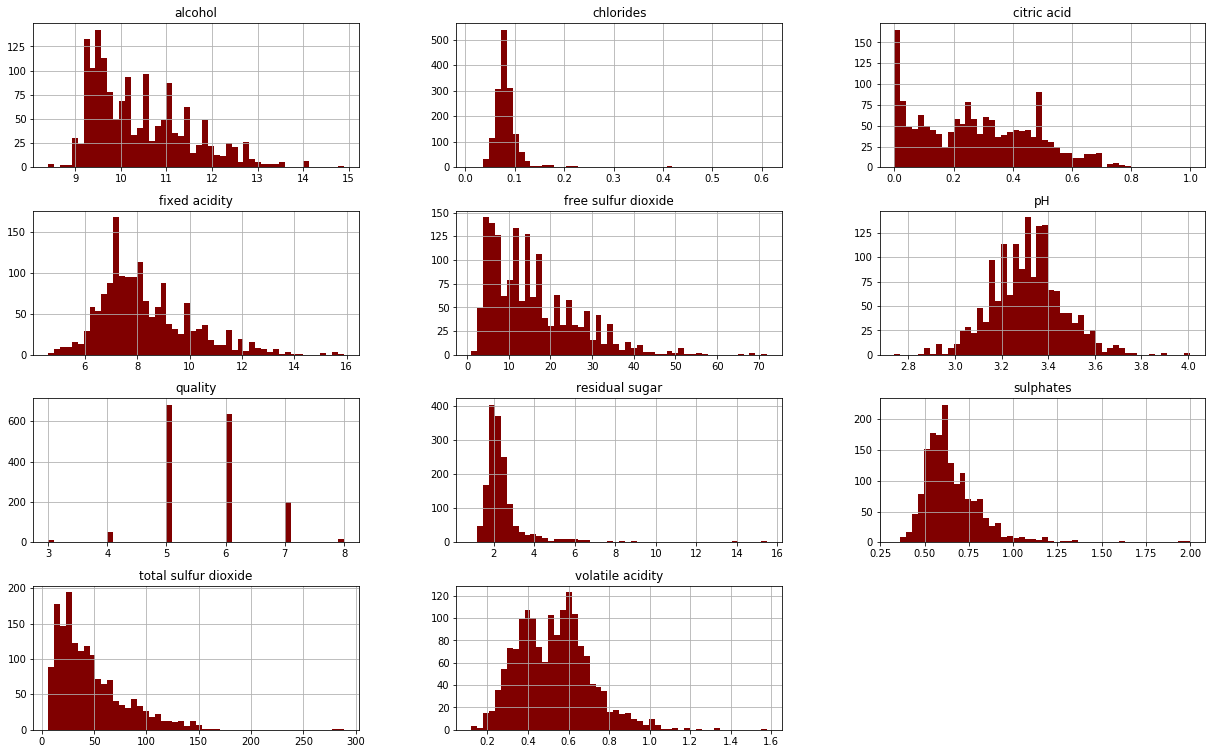

In [4]:
df.hist(bins=50, figsize=(21,13), color='maroon');

# Find which features have a linear relationship with quality

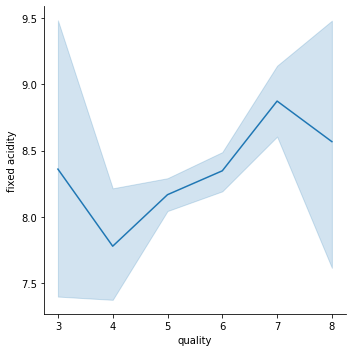

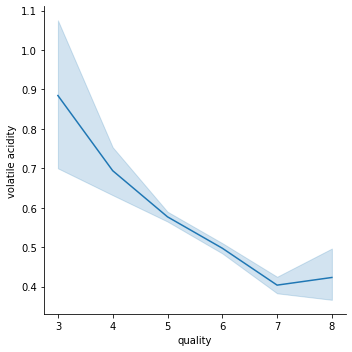

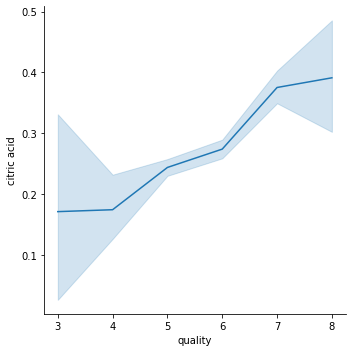

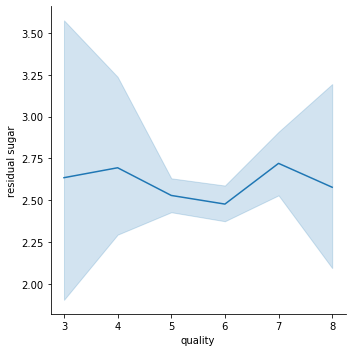

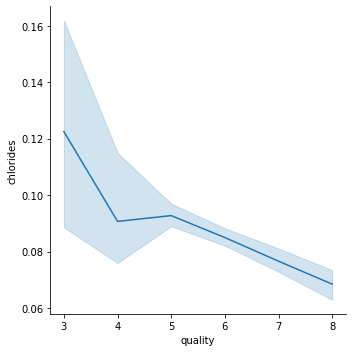

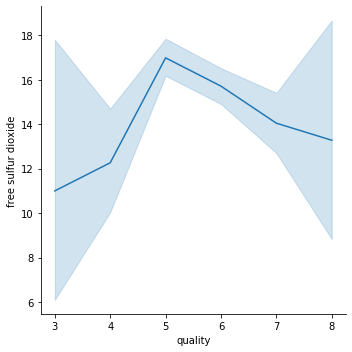

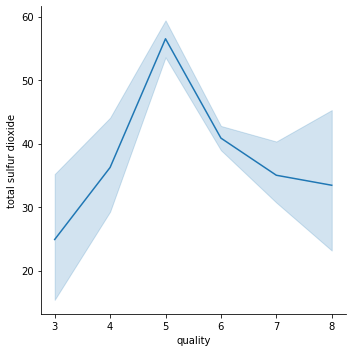

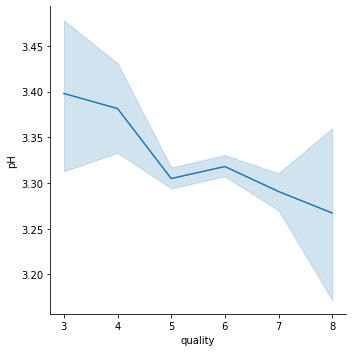

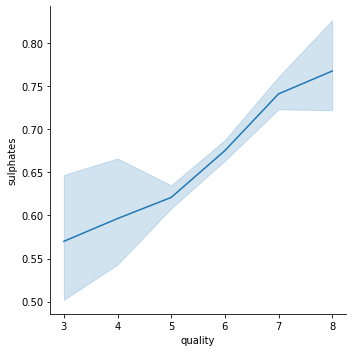

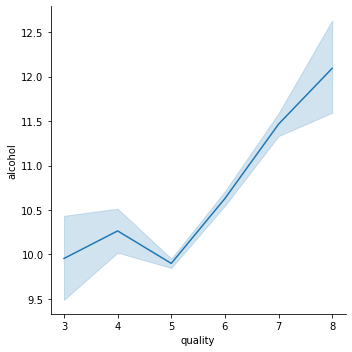

In [5]:
all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

for feature in all_features:
    sns.relplot(data = df, y = feature, x = 'quality', kind='line', height=5, aspect=1)

# Select your predictor features and your target variable.

The predictor features are called the independent variables, inputs, predictors, or `X`.

The dependent features are called the dependent variables, outputs, target, or `y`.

It is a common practice to denote the input features with `X` and targets with `y`.

# Lets talk about features a bit more before moving forward
* Features are the _things_ we are using to predict wine quality.
* They are what we are using to _explain_ our target variable of wine quality.  
* They are commonly referred to as `X`.

In [6]:
# OUR THINGS AKA FEATURES ARE OUR EXPLANATORY VARIABLES
# THESE ARE WHAT WE ARE GOING TO USE TO PREDICT THE QUALITY OF THE WINE
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

# OUR TARGET, THE THING WE ARE TARGETING TO EXPLAIN, IS OUR DEPENDENT VARIABLE
# THIS IS OUR OUTPUT
target = ['quality'] 


# ISOLATE THE DATA TO JUST OUR FEATURES
X = df[features].values


# ISOLATE JUST OUR TARGET DATA, THIS IS WHAT WE ARE TRYING TO PREDICT
y = df[target].values

# Split our data into a training set and a testing set.
We do this to avoid overfitting which is a larger concept you can learn more about [here](https://en.wikipedia.org/wiki/Overfitting) and [here](https://blog.minitab.com/blog/adventures-in-statistics-2/the-danger-of-overfitting-regression-models).
<br><br>Basically, we want our model to predict wine quality using new data that its never seen before. 


To do this we hold out some of the data and pretend that its new data so we can evaluate how well the model does with this 'new' data. 

In [7]:
# SPLIT OUR DATA INTO TRAINING AND TESTING SETS, 
# 80% GOING INTO OUR TESTING, AND HOLDING OUT 20% FOR OUR TESTING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize our Linear Regression model.

In [8]:
# INITIALIZE OUR LIN REG MODEL
model = LinearRegression()

# Use our training data to fit aka train our model.
* We could spend a whole semester going into the math behind the fitting model process. 
* At the highest level, it finds the best trend line for each of the input variables.  
* I encourage you to read this article explaining Linear Regression using OLS regression in further detail [here](https://towardsdatascience.com/simple-linear-regression-and-ols-introduction-to-the-theory-1b48f7c69867).

In [9]:
# THIS IS THE HEART OF OUR MODEL'S PROCESS
# IT TAKES IN THE TRAINING DATA AND DOES ALL THE FANCY MATH
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Make new predicitions using our testing data.
* We will come back to discuss and inspect this in further detail later on in the notebook. 

In [10]:
y_pred = model.predict(X_test)

# Now lets see how well the model explains the data by finding the R-Squared.
* You can think of r-squared as a goodness of fit measure for the model. 
* How well the trendline explains the variance of the data. 
* R-squared measure the strength of the relationship between your model and the dependent variable on a 0-100% scale.
* Remember for human labeled data like the quality of wine, .3 is pretty good.

In [11]:
r_squared = model.score(X_test, y_test)
print('R-Squared Score:', r_squared)

R-Squared Score: 0.3321984062294697


# Now find the Mean Absolute Error of our model

In [12]:
# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mae)

Mean Squared Error: 0.47393122376582414


# What does the Mean Squared Error tell us?
* It tells us that, on average, our wine quality predictions are ~0.5 from the actual wine quality.

___
## Inspecting our coefficients.

# If you only remember one thing from this lesson let it be this... <br><br> The _coefficients_ of our model explain how each feature impact wine quality.

In [13]:
# GET THE COEFFICIENT VALUES FROM THE MODEL
coefficient_values = model.coef_

# MAKE A DATA FRAME OUT OF THE VALUES AND THEIR COLUMN NAMES
df_coefficients = pd.DataFrame(coefficient_values, columns=features).T

# RENAME THE COLUMN FROM 0 TO COEFFICIENT
df_coefficients.columns = ['coefficient']

# DISPLAY THE DATA FRAME
df_coefficients

,coefficient
fixed acidity,0.013027
volatile acidity,-1.142426
citric acid,-0.271042
residual sugar,0.005160
chlorides,-1.843446
free sulfur dioxide,0.005693
total sulfur dioxide,-0.003564
pH,-0.531600
sulphates,0.884123
alcohol,0.299954


# Looking at the coefficient for _suplhates_ above, the coefficient means that... <br><br> 
# A 1 unit increase in _suplhates_ will lead to an increase of 0.88 in Quality of wine.

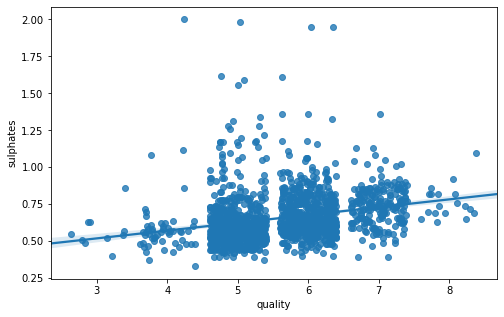

In [14]:
plt.figure(figsize=(8,5))

# USE SEABORN REGPLOT TO PLOT THE LINEAR RELATIONSHIP AND TRENDLINE
# OF SULPHATES IN RELATION TO QUALITY
sns.regplot(x='quality', y='sulphates', data=df, x_jitter=0.4);

## As we can see above, an increase in sulphates leads to an increase of quality. 
___

# Now, lets use our trained model to make new predictions. 
* Use the `X_test` data we held out at the beginning that the model has not seen yet.
* Plug that into the model.predict function
* Save the results so we can compare them with the actual values (y_test)

In [15]:
# USE OUR TESTING DATA TO MAKE NEW PREDICTIONS
test_pred = model.predict(X_test)

# Now, lets compare the test predictions to the test values. 

In [17]:
# CREATE A PANDAS DATAFRAME USING OUR PREDICTIONS 
df_preds = pd.DataFrame(test_pred, columns=['predictions'])

# CREATE A COLUMN OF THE ACTUAL VALUES FROM OUR TEST SET
df_preds['actual'] = y_test

# CALCULATE THE ABSOLUTE ERROR OF THE PREDICTIONS TO OUR ACTUAL 
df_preds['abs_error'] = abs(df_preds['predictions'] - df_preds['actual'])

# DISPLAY OUR DATAFRAME
df_preds.head(10)

,predictions,actual,abs_error
0,5.555961,5,0.555961
1,5.379605,6,0.620395
2,6.068429,6,0.068429
3,5.731999,6,0.268001
4,6.693845,6,0.693845
5,5.963812,6,0.036188
6,6.169843,6,0.169843
7,5.061078,5,0.061078
8,5.770729,5,0.770729
9,5.145622,5,0.145622


# Lets manually make a predicition of one wine value.

In [18]:
# GET THE FIRST ROW OF DATA
one_row_of_data = df[features].head(1).T

one_row_of_data

,0
fixed acidity,7.400
volatile acidity,0.700
citric acid,0.000
residual sugar,1.900
chlorides,0.076
free sulfur dioxide,11.000
total sulfur dioxide,34.000
pH,3.510
sulphates,0.560
alcohol,9.400


In [19]:
# PLACE THE FIRST VALUE FROM OUR DATA INTO OUR COEFFICIENTS DATAFRAME
df_coefficients['one_wine_review'] = one_row_of_data

# DISPLAY OUR COEFS NEXT TO OUR ONE ROW OF DATA
df_coefficients

,coefficient,one_wine_review
fixed acidity,0.013027,7.400
volatile acidity,-1.142426,0.700
citric acid,-0.271042,0.000
residual sugar,0.005160,1.900
chlorides,-1.843446,0.076
free sulfur dioxide,0.005693,11.000
total sulfur dioxide,-0.003564,34.000
pH,-0.531600,3.510
sulphates,0.884123,0.560
alcohol,0.299954,9.400


In [20]:
# MANUALLY MULTIPLY EACH FEATURE BY THEIR COEFFICIENTS 
df_coefficients['coef_x_review'] = df_coefficients['coefficient'] * df_coefficients['one_wine_review']

# DISPLAY THE DATAFRAME
df_coefficients

,coefficient,one_wine_review,coef_x_review
fixed acidity,0.013027,7.400,0.096398
volatile acidity,-1.142426,0.700,-0.799698
citric acid,-0.271042,0.000,-0.000000
residual sugar,0.005160,1.900,0.009803
chlorides,-1.843446,0.076,-0.140102
free sulfur dioxide,0.005693,11.000,0.062626
total sulfur dioxide,-0.003564,34.000,-0.121176
pH,-0.531600,3.510,-1.865916
sulphates,0.884123,0.560,0.495109
alcohol,0.299954,9.400,2.819571


### Remember... _Prediction = y-intercept + coefficient₁X₁ + coficient₂X₂ + … + coefficientiXi._

In [21]:
# TAKE SUM AND ADD THE Y-INTERCEPT
wine_quality_prediction = model.intercept_ + df_coefficients['coef_x_review'].sum()

# DISPLAY THE PREDICTION
wine_quality_prediction

array([5.04716215])

In [23]:
# NOW COMPARE THAT TO USING OUR MODELS PREDICTION FUNCTION
model.predict(one_row_of_data.T.values)

array([[5.04716215]])

# Saving and exporting our model for future use.
* Use the library pickle to export the pickle

In [ ]:
import pickle

# NAME YOUR MODEL 
filename = 'red_wine_model.pkl'

# EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
pickle.dump(model, open(filename, 'wb'))

In [ ]:
## HOW TO LOAD IT FOR FUTURE USE
# model = pickle.load(open(filename, 'rb'))

# Now please go to the lab notebook so you can try it out for yourself.